**Medical Charges  Prediction**



This is Predictive modeling. Data set has 7 columns.
The target varialble is amount of money a person spends on medical charges. Since the target variable is available in training data so
the model that is going to be built will be a **Supervised Learning model**. Supervised meaning we used labeled data to train the model.
The target variable variable has continous values so it will be a **reggressor model**.

The Task is to predict the amount of money a will spend on medical charges based on the various characteristics of person like age,Bmi,habits e.t.c.
The model can be used in deciding the insurance premium for health insurance of a person

**Data Exploration:**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Impoting neccessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor


Reading the data set

In [7]:

#df = pd.read_csv('drive/My Drive/insurance.csv')
df = pd.read_csv('insurance.csv')

Data set has 7 columns and 1338 rows

In [3]:
df.shape

(1338, 7)

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [58]:
# Now checking the datatype of all the columns/variables:
df.dtypes


age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object



This shows there are 2 columns of int type, 1 columns of float type, & 3 columns of object type in the dataset.

The categorical variables are stored as 'object'. Whereas continuous variables are stored as 'int' or 'float'. The int type can only take discrete/fixed integer values. Whereas float type can take any real values.


 1.   Age: Age of the person.

 2. sex : Gender of the person.

 3. bmi : Body mass index is a value derived from the mass and height of a person. The BMI is defined as the body mass divided by the square of the body height, and is expressed in units of kg/m², resulting from mass in kilograms and height in metres.

 4.children : No of children a person has.

 5.region : region of residence of person.

 6. charges : Amount of money spent on medical expenses by a person.



**Checking the null values in dataset**


There are no null values present in the data set.

In [ ]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Region has 4 unique categories

In [ ]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

Each region has almost an equal Probability.

In [ ]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

Minimum age of a person is 18 years and maximum is 64 years.
Average age in data set is 39.2 years and median is 39 years.
 

In [ ]:
df.agg(
       {
           'age' : ['min','max','median','mean','skew'],
           'charges' : ['min','max','median','mean','skew'],
          'bmi'   : ['min','max','median','mean','skew'],
       }
)

,age,charges,bmi
min,18.000000,1121.873900,15.960000
max,64.000000,63770.428010,53.130000
median,39.000000,9382.033000,30.400000
mean,39.207025,13270.422265,30.663397
skew,0.055673,1.515880,0.284047


Average age for both genders is almost equal.
Age distribution for male and female categories is same.

In [ ]:
df[['age','sex']].groupby('sex').mean()

,age
sex,
female,39.503021
male,38.917160


The Probability of person being smoker is slightly higher for men then women.

In [6]:
df.groupby(['smoker','sex']).size().unstack()

sex,female,male
smoker,,
no,547,517
yes,115,159


Each Region has equal distribution of smokers and non-smokers.

In [ ]:
df.groupby(['smoker','region']).size().unstack()

region,northeast,northwest,southeast,southwest
smoker,,,,
no,253,263,269,264
yes,67,57,87,56


People with 2 or 3 children have higher chances of being a smoker.

In [ ]:
df.groupby(['smoker','children']).size().unstack()

children,0,1,2,3,4,5
smoker,,,,,,
no,450,261,183,116,22,17
yes,111,60,53,39,3,1


Average Bmi for Male and Female gender is same.


In [ ]:
df[['bmi','sex']].groupby('sex').mean()

,bmi
sex,
female,30.332012
male,30.911293


Average charges for men is higher then women.




In [ ]:
df[['charges','sex']].groupby('sex').mean()

,charges
sex,
female,12385.001888
male,13806.206140


The average medical charges for smokers is much higher then non-smokers. Smoker varaible will be an important varible for predicting the medical charges.

In [ ]:
df[['charges','smoker']].groupby('smoker').mean()

,charges
smoker,
no,8328.866740
yes,31860.607122


In [ ]:
df.groupby('sex').mean(numeric_only=True)

,age,bmi,children,charges
sex,,,,
female,39.089094,30.332012,1.075269,12385.001888
male,38.502256,30.911293,1.124812,13806.206140


In [ ]:
df.groupby('smoker').mean(numeric_only=True)

,age,bmi,children,charges
smoker,,,,
no,39.033365,30.598294,1.094376,8328.866740
yes,37.846442,30.728614,1.123596,31860.607122


In [ ]:
df.groupby('region').mean(numeric_only=True)

,age,bmi,children,charges
region,,,,
northeast,39.268519,29.173503,1.046296,13406.384516
northwest,39.196923,29.199785,1.147692,12417.575374
southeast,38.939560,33.355989,1.049451,14735.411438
southwest,39.455385,30.596615,1.141538,12346.937377


Removing the outliers. 



In [4]:

def Outliers(df,cols):
  outliers = []
  for c in cols:
    Q1 = df[c].quantile(.25)
    Q3 = df[c].quantile(.75)
    IQR = Q3 - Q1
    step = 1.5*IQR
    df = df[~((df[c] < (Q1 - step)) | (df[c] >  (Q3 + step)))]
    return df
    

In [5]:
cols = df.select_dtypes(include = ('int64','float64'))


In [7]:
df = Outliers(df,cols)

In [8]:
df.shape

(1338, 7)

Charges and age have a good positive coreleation.

<AxesSubplot:>

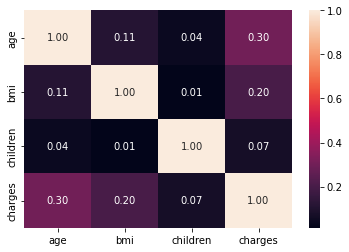

In [9]:

sns.heatmap(df.corr(),annot = True , fmt = '.2f')

Distribution of charges:
Target variables is positively skewed.

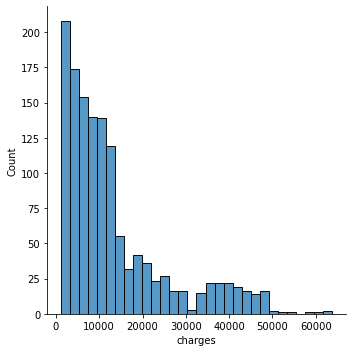

In [10]:
sns.displot(df,x = df['charges'],kind = 'hist')

The distribution of medical charges for smokers and non - smokers is different. For smokers the medical charges are towards higher side.

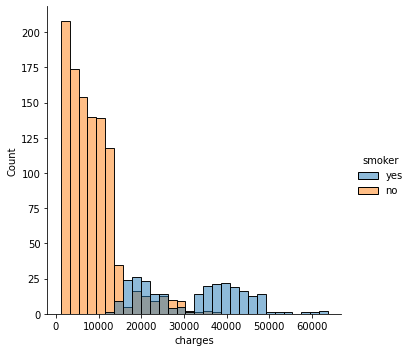

In [ ]:
sns.displot(df,x=df['charges'],kind='hist',hue = 'smoker')

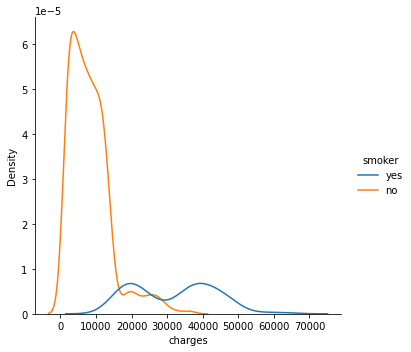

In [ ]:
sns.displot(df,x=df['charges'],kind='kde',hue = 'smoker')

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


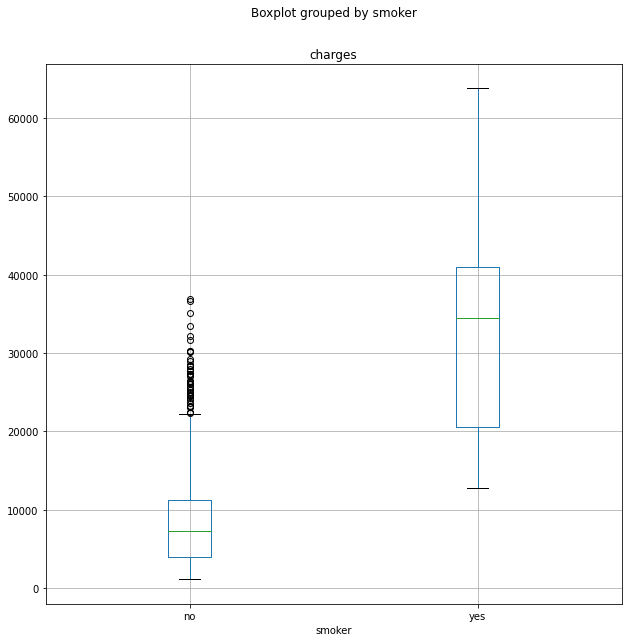

In [ ]:
df.boxplot(column = 'charges' , by = 'smoker', figsize = (10,10))


The scatter plots show a positive corelation between age and target variable.Older people seem to have higher medical charges.

<Figure size 1080x1080 with 0 Axes>

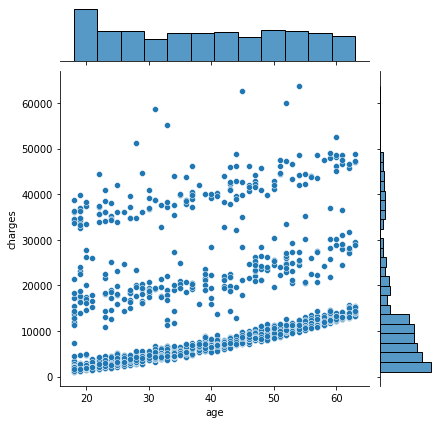

In [ ]:
  plt.figure(figsize=(15,15))
  sns.jointplot(data=df,x='age',y='charges')

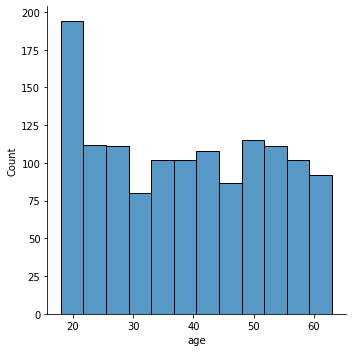

In [ ]:

sns.displot(data = df, x = df['age'],kind = 'hist')

Bmi is evenly distributed along the mean.

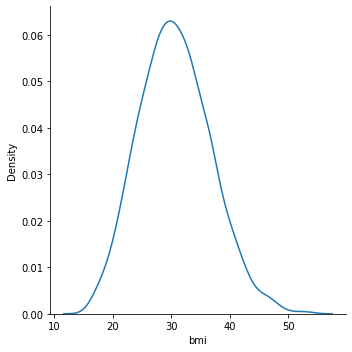

In [ ]:
sns.displot(data = df, x = df['bmi'], kind = 'kde')

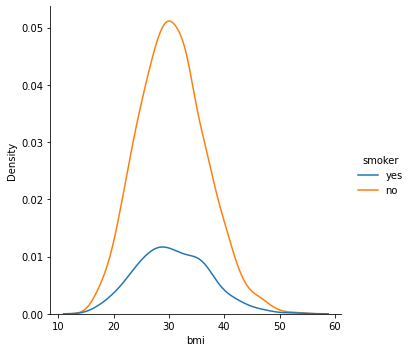

In [ ]:
sns.displot(data = df, x = df['bmi'], kind = 'kde', hue = 'smoker')

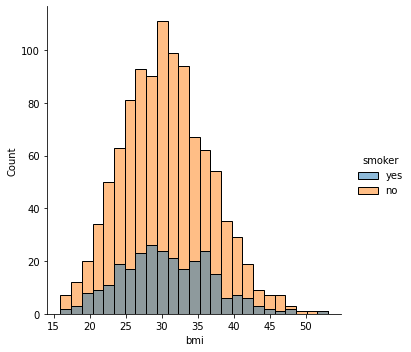

In [ ]:
sns.displot(data = df, x = df['bmi'], kind = 'hist', hue = 'smoker')

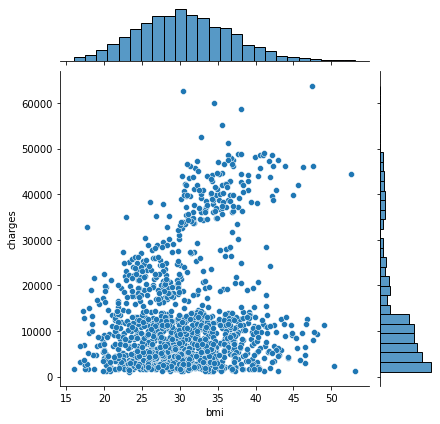

In [ ]:
sns.jointplot(data = df, x = df['bmi'] , y = df['charges'])

Bmi also has positive corelation with target variable.
Very low and high bmi have higher medical charges.

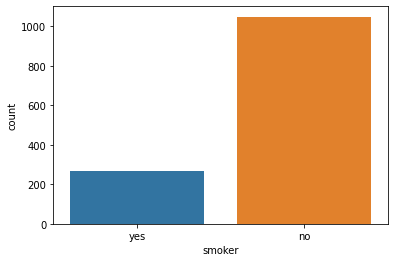

In [ ]:
sns.countplot(x = df['smoker'])

The number of non-smokers is much higher then smokers.

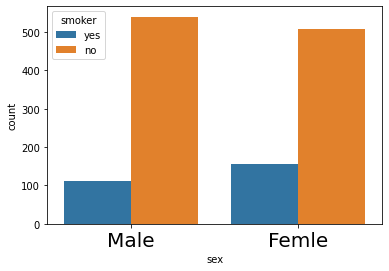

In [ ]:
cp = sns.countplot(x = df['sex'],hue = df['smoker'])
cp.set_xticklabels(['Male','Femle'],fontsize = 20)
plt.show()


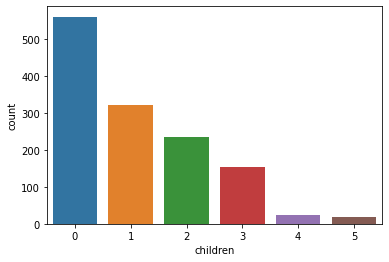

In [ ]:
sns.countplot(x = df['children'])

Most people have no childeren. Very fw people have children 3 or more children.

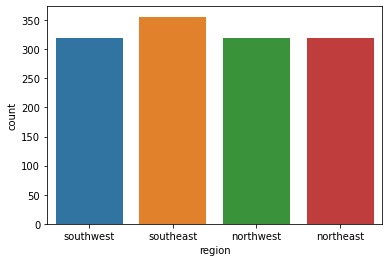

In [ ]:
sns.countplot(x = df['region'])

Each region has an equal frquency in dataset.

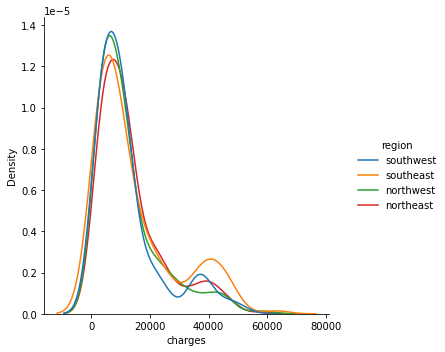

In [ ]:
sns.displot(data = df, x = df['charges'], hue = df['region'], kind = 'kde')

All the regions have similar distribution of charges , there is no significant impact on charges due to region. So we can drop region column.

In [8]:
df = df.drop(['region'],axis = 1)

**Data Processing.**

Binning the data:






Since we are using tree based model its will be good to see how model works with binned data for continoues variables like age and bmi.This will reduce the number of comparisions.

In [ ]:
df['age'].min(),df['age'].max()

(18, 63)

In [12]:
def binning(col,cut_points,labels):
  min_val = col.min()
  max_val = col.max()
  break_points = [min_val]  + cut_points + [max_val]
  age_bin = pd.cut(col,bins = break_points, labels = labels , include_lowest=True)
  return age_bin



In [13]:
cut_points = [30,45]
labels = ['Young' , 'Middle_aged', 'Old']
df['Age_bin'] = binning(df['age'],cut_points , labels)

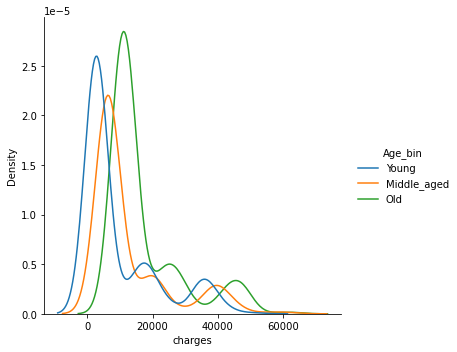

In [14]:
sns.displot(data = df , x = df['charges'] , hue = 'Age_bin' , kind = 'kde')

Age variable is binned into 3 categories  


18-30 years : Young.

30-45 years : Middle aged.

45-64 years : Old.

The average charges for old person is higher.


In [15]:
df['bmi'].max() ,df['bmi'].min()

(53.13, 15.96)

In [18]:
cut_points  = [18,25,30]
labels  =  ['Under_weight','Healthy_weight','Over_weight','Obese']
df['bmi_bin'] = binning(df['bmi'],cut_points,labels)

In [19]:
df.head()

,age,sex,bmi,children,smoker,charges,Age_bin,bmi_bin
0,19,female,27.900,0,yes,16884.92400,Young,Over_weight
1,18,male,33.770,1,no,1725.55230,Young,Obese
2,28,male,33.000,3,no,4449.46200,Young,Obese
3,33,male,22.705,0,no,21984.47061,Middle_aged,Healthy_weight
4,32,male,28.880,0,no,3866.85520,Middle_aged,Over_weight


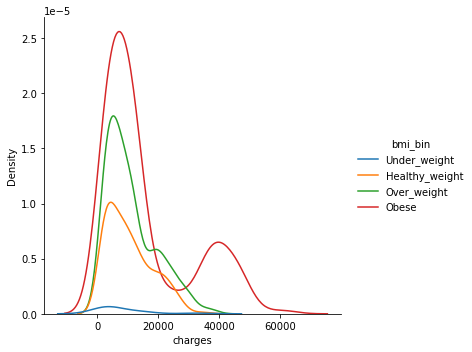

In [20]:
sns.displot(data = df, x = df['charges'] , hue = 'bmi_bin' , kind = 'kde')

Bmi is binned into 4 categories:


Bmi less than 18 is underweight.


Bmi between 18 and 25 is helathy.


Bmi between 25 and 30 is overweight.



Bmi greater then 30 is Obese.


Data- preprocessing.

In [21]:
df_binned = df.drop(['age','bmi'],axis = 1)


In [22]:
df_binned.head()

,sex,children,smoker,charges,Age_bin,bmi_bin
0,female,0,yes,16884.92400,Young,Over_weight
1,male,1,no,1725.55230,Young,Obese
2,male,3,no,4449.46200,Young,Obese
3,male,0,no,21984.47061,Middle_aged,Healthy_weight
4,male,0,no,3866.85520,Middle_aged,Over_weight


In [9]:
df = pd.get_dummies(df)
#df_binned = pd.get_dummies(df_binned)

The scikit learn algorithms take two separate arguments. This means they need independent variables separately & the dependent variable (or target variable) separately. But since in the train dataset both independent & dependent variables are present together so we need to separate them out.

This split function accepts an independent variable 'x' & a dependent variable 'y', and then split them into two parts. First is independent variable for train and independent variable for test. And then dependent variable for train and dependent variable for test , naming them asx_train, x_test, y_train, y_test respectively as follows:

sklearn takes input in terms of numbers only. ie; either as int datatype or as float datatype. This means sklearn doesn't take string as input. So to get rid of strings we need to create numeric features out of these categorical or string features. So we will use a concept called Dummification.

In [10]:
Y = df['charges']
df = df.drop(['charges'],axis = 1)
X = df.iloc[:, :-1].values
Y = Y.iloc[:].values.reshape(-1,1)

In [11]:

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=41)

Traing the model.

In [105]:
df.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes
0,19,27.900,0,16884.92400,1,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0
2,28,33.000,3,4449.46200,0,1,1,0
3,33,22.705,0,21984.47061,0,1,1,0
4,32,28.880,0,3866.85520,0,1,1,0


In [12]:
from sklearn.tree import DecisionTreeRegressor

In [18]:
model00 = DecisionTreeRegressor()
model00.fit(X_train,Y_train)

DecisionTreeRegressor()

In [21]:
predictions = model00.predict(X_test)

**Model Evaluation**

We will predict value for target variable by using our model parameter for test data set. Then compare the predicted value with actual valu in test set. We compute Mean Square Error using formula:


$MSE = \frac{1}{n}\sum_{i = 0}^n (yi-yp)^2$

R2 is statistical measure of how close data are to the fitted regression line. R2 is always between 0 to 100%. 0% indicated that model explains none of the variability of the response data around it's mean. 100% indicated that model explains all the variablity of the response data around the mean.

$R^2 = 1 - \frac {SSE}{SST}$

SSE = Sum of Square Error
SST = Sum of Square Total




$SSE = \frac{1}{n}\sum_{i = 0}^n (yi-yp)^2$

$SST = \frac{1}{n}\sum_{i = 0}^n (yi-y')^2$


Here y^ is predicted value and y' is mean value of y







**Evaluation for Binned data**



In [52]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions_binned))
print('MSE:', metrics.mean_squared_error(y_test, predictions_binned))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_binned)))
print('R2:',metrics.r2_score(y_test, predictions_binned))

MAE: 3068.1347870490486
MSE: 27418963.238033272
RMSE: 5236.311988225422
R2: 0.805247307591064


**Evaluation for data without binning**

In [23]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(Y_test, predictions))
print('MSE:', metrics.mean_squared_error(Y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, predictions)))
print('R2:',metrics.r2_score(Y_test, predictions))

MAE: 3109.757466380597
MSE: 41843772.23309705
RMSE: 6468.676234987885
R2: 0.6278025797879019


In [38]:
class Node():
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, std_red=None, value=None):
        ''' constructor ''' 
        
        # for decision node
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.std_red = std_red
        
        # for leaf node
        self.value = value
        

In [67]:
class DecisionTreeRegressor():
    def __init__(self, min_samples_split=2, max_depth=7):
        ''' constructor '''
        
        # initialize the root of the tree 
        self.root = None
        
        # stopping conditions
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        
    def Build_tree(self, dataset, curr_depth=0):
        
        X, Y = dataset[:,:-1], dataset[:,-1]
        num_samples, num_features = np.shape(X)
        best_split = {}
        
        # split until stopping conditions are met
        if num_samples>=self.min_samples_split and curr_depth<=self.max_depth:
            
            # find the best split
            best_split = self.find_best_split(dataset, num_samples, num_features)
            
            # check if information gain is positive
            if best_split["std_red"]>0:
                # recur left
                left_subtree = self.Build_tree(best_split["dataset_left"], curr_depth+1)
                # recur right
                right_subtree = self.Build_tree(best_split["dataset_right"], curr_depth+1)
                # return decision node
                return Node(best_split["feature_index"], best_split["threshold"], 
                            left_subtree, right_subtree, best_split["std_red"])
        
        # compute leaf node
        leaf_value = self.calculate_leaf_value(Y)
        # return leaf node
        return Node(value=leaf_value)
    
    def find_best_split(self, dataset, num_samples, num_features):
        
        # dictionary to store the best split
        best_split = {}
        max_std_red = -float("inf")
        
        for feature_index in range(num_features):
            feature_values = dataset[:, feature_index]
            possible_thresholds = np.unique(feature_values)
            
            for threshold in possible_thresholds:
               
                dataset_left, dataset_right = self.split(dataset, feature_index, threshold)
                
                if len(dataset_left)>0 and len(dataset_right)>0:
                    y, left_y, right_y = dataset[:, -1], dataset_left[:, -1], dataset_right[:, -1]
                    
                    
                    curr_std_red = self.std_reduction(y, left_y, right_y)
                  
                
                    if curr_std_red>max_std_red:
                        best_split["feature_index"] = feature_index
                        best_split["threshold"] = threshold
                        best_split["dataset_left"] = dataset_left
                        best_split["dataset_right"] = dataset_right
                        best_split["std_red"] = curr_std_red
                        max_std_red = curr_std_red
                        
        # returns best split
        return best_split
    
    def split(self, dataset, feature_index, threshold):
        
        dataset_left = np.array([row for row in dataset if row[feature_index]<=threshold])
        dataset_right = np.array([row for row in dataset if row[feature_index]>threshold])
        return dataset_left, dataset_right
    
    def std_reduction(self, parent, l_child, r_child):
        
        weight_l = len(l_child) / len(parent)
        weight_r = len(r_child) / len(parent)
        reduction = np.var(parent) - (weight_l * np.var(l_child) + weight_r * np.var(r_child))
        return reduction
    
    def sse_reduction(self,parent,lchild,rchild):
      pass
    
    
    def calculate_leaf_value(self, Y):
        
        val = np.mean(Y)
        return val
                
    
    def fit(self, X, Y):
        
        dataset = np.concatenate((X, Y), axis=1)
        self.root = self.Build_tree(dataset)
        
    def prediction(self, x, tree):
        
        if tree.value!=None: return tree.value
        feature_val = x[tree.feature_index]
        if feature_val<=tree.threshold:
            return self.prediction(x, tree.left)
        else:
            return self.prediction(x, tree.right)
    
    def predict(self, X):
        
        preditions = [self.prediction(x, self.root) for x in X]
        return preditions


In [68]:
model11 = DecisionTreeRegressor()

In [69]:
model11.fit(X_train,Y_train)

In [61]:
Y_pred = model11.predict(X_test)

In [62]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(Y_test, Y_pred))
print('MSE:', metrics.mean_squared_error(Y_test, Y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print('R2:',metrics.r2_score(Y_test, Y_pred))

MAE: 2791.7629119116723
MSE: 27756821.928591017
RMSE: 5268.474345442997
R2: 0.7531050150651409


In [47]:
from sklearn.metrics import mean_absolute_percentage_error

In [63]:
print('MAE:', mean_absolute_percentage_error(Y_test, Y_pred))

MAE: 0.3273221296926625


In [57]:
print('MAE:', mean_absolute_percentage_error(Y_test, predictions))

MAE: 0.3285683919006898
